In [4]:
import pandas as pd

In [7]:
cols = ['title']
data = pd.read_csv('./movies_clean.csv', usecols=cols)
movies = data.head(17000)

In [8]:
movies.dropna(inplace=True)

C:\Users\marti\AppData\Local\Temp\ipykernel_16152\3786870272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)


In [9]:
movies.head(2)

,title
0,Toy Story
1,Jumanji


In [10]:
import pickle 

In [11]:
pickle.dump(movies.to_dict(), open('listado.pkl', 'wb'))

La funcion de predictora esta desarrollada en el archivo main

## EDA


In [33]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [24]:
df = pd.read_csv('./movies_clean.csv')

Hacemos un shape del dataframe para conocer cuantas filas y cuantas columnas tiene 

In [25]:
df.shape

(45376, 21)

Observamos las primeras 5 filas con .head

In [7]:
df.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,release_year,return,release_month,release_day
0,Toy Story Collection,30000000,"['Animation', 'Comedy', 'Family']",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],['United States of America'],1995-10-30,...,81.0,['English'],Released,NaN,Toy Story,7.7,1995.0,12.451801,octubre,lunes
1,NaN,65000000,"['Adventure', 'Fantasy', 'Family']",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],1995-12-15,...,104.0,"['English', 'Français']",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,1995.0,4.043035,diciembre,viernes
2,Grumpy Old Men Collection,0,"['Romance', 'Comedy']",15602,en,A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",['United States of America'],1995-12-22,...,101.0,['English'],Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,1995.0,0.000000,diciembre,viernes
3,NaN,16000000,"['Comedy', 'Drama', 'Romance']",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],['United States of America'],1995-12-22,...,127.0,['English'],Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,1995.0,5.090760,diciembre,viernes
4,Father of the Bride Collection,0,['Comedy'],11862,en,Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],1995-02-10,...,106.0,['English'],Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,1995.0,0.000000,febrero,viernes


Observamos que tipo de datos tienen as columnas que vamos a analizar

In [26]:
df.dtypes

belongs_to_collection     object
budget                     int64
genres                    object
id                         int64
original_language         object
overview                  object
popularity               float64
production_companies      object
production_countries      object
release_date              object
revenue                  float64
runtime                  float64
spoken_languages          object
status                    object
tagline                   object
title                     object
vote_average             float64
release_year             float64
return                   float64
release_month             object
release_day               object
dtype: object

En el siguiente paso eliminaremos las columas que nos parecen irrelevantes para desarrollar nuestro modelo de prediccion


Solamente nos quedaremos con las siguientes columas: belongs_to_collection, genres, overview, production_companies, title y vote_average

In [27]:
df = df.drop(['budget', 'id', 'original_language', 'production_countries', 'revenue', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'return', 'release_year', 'release_month', 'release_day'], axis=1)

In [28]:
df.head()

,belongs_to_collection,genres,overview,popularity,production_companies,title,vote_average
0,Toy Story Collection,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],Toy Story,7.7
1,NaN,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",Jumanji,6.9
2,Grumpy Old Men Collection,"['Romance', 'Comedy']",A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",Grumpier Old Men,6.5
3,NaN,"['Comedy', 'Drama', 'Romance']","Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],Waiting to Exhale,6.1
4,Father of the Bride Collection,['Comedy'],Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",Father of the Bride Part II,5.7


Observamos cuantos valores faltantes o nulos hay

In [29]:
df.isna().sum()

belongs_to_collection    40888
genres                       0
overview                   941
popularity                   0
production_companies     11796
title                        0
vote_average                 0
dtype: int64

Podemos concluir que la columna 'belongs_to_collection' casi la totalidad de sus valores nulos, por lo que procederemos a eliminarla de nuestro analisis. Seria una muy buena fuente para filtrar y quizas una de las mas importantes si tuviera los datos correspondientes 

In [30]:
df = df.drop(['belongs_to_collection'], axis=1)

In [31]:
df.head()

,genres,overview,popularity,production_companies,title,vote_average
0,"['Animation', 'Comedy', 'Family']","Led by Woody, Andy's toys live happily in his ...",21.946943,['Pixar Animation Studios'],Toy Story,7.7
1,"['Adventure', 'Fantasy', 'Family']",When siblings Judy and Peter discover an encha...,17.015539,"['TriStar Pictures', 'Teitler Film', 'Intersco...",Jumanji,6.9
2,"['Romance', 'Comedy']",A family wedding reignites the ancient feud be...,11.712900,"['Warner Bros.', 'Lancaster Gate']",Grumpier Old Men,6.5
3,"['Comedy', 'Drama', 'Romance']","Cheated on, mistreated and stepped on, the wom...",3.859495,['Twentieth Century Fox Film Corporation'],Waiting to Exhale,6.1
4,['Comedy'],Just when George Banks has recovered from his ...,8.387519,"['Sandollar Productions', 'Touchstone Pictures']",Father of the Bride Part II,5.7


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45376 entries, 0 to 45375
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   genres                45376 non-null  object 
 1   overview              44435 non-null  object 
 2   popularity            45376 non-null  float64
 3   production_companies  33580 non-null  object 
 4   title                 45376 non-null  object 
 5   vote_average          45376 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.1+ MB


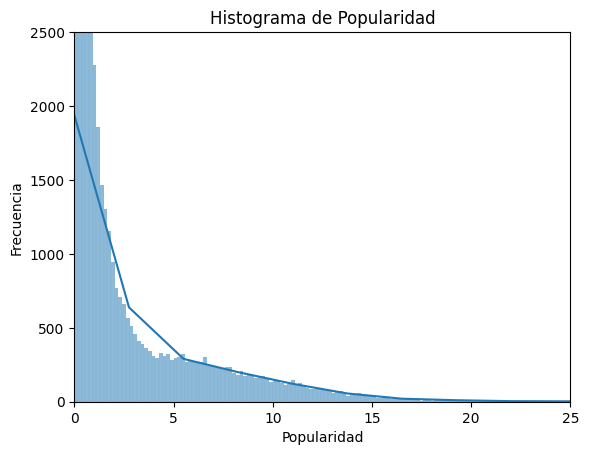

In [37]:
sns.histplot(data=df, x='popularity', kde=True)
plt.xlabel('Popularidad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Popularidad')
#limito los ejes
plt.xlim(0, 25)
plt.ylim(0, 2500)
plt.show()


Observamos un sesgo muy grande hacia la derecha, lo que quiere decir que hay una cantidad muy grande de peliculas con una puntutacion baja de popularidad y hay un numero muy pequeño de peliculas que alcanzaron una popularidad muy alta. Esto nos podria afectar a nuestro analisis ya que al haber un alto sesgo puede afectar a los valores como la media y la mediana

In [42]:
popularity = df['popularity']
vote_average = df['vote_average']

Realizamos un grafico para observar la relacion entre la popularidad de la pelicula y el promedio de votos 

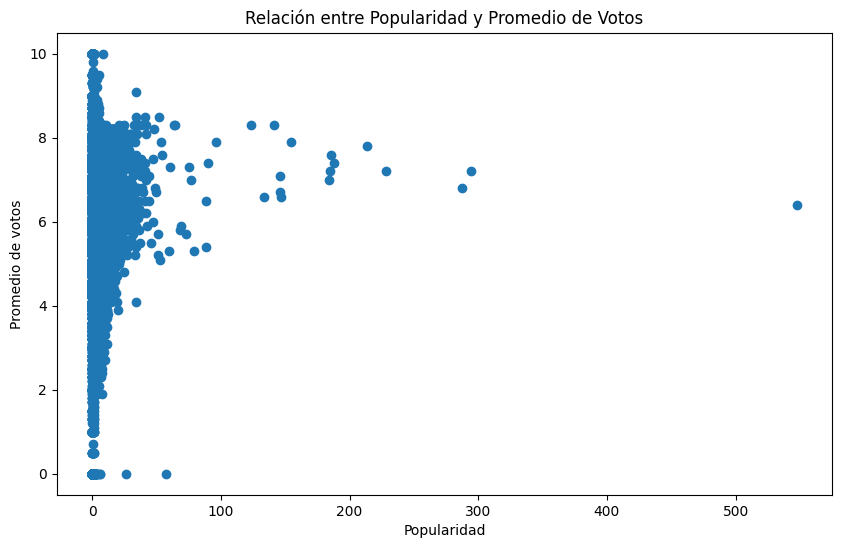

In [43]:
plt.figure(figsize=(10, 6))  
plt.scatter(popularity, vote_average)
plt.xlabel('Popularidad')
plt.ylabel('Promedio de votos')
plt.title('Relación entre Popularidad y Promedio de Votos')
plt.show()

De todas formas para el modelo en particular que vamos a desarrollar no nos sirven mucho estos analisis, ya que solamente tendremos en cuenta los titulos de la pelicula 

Nos vemos obligados a tomar solamente esta variable y solo 17000 datos del dataframe original para poder procesar los datos en el computador y poder hacer el correspondiente deploy sin superar la capacidad gratuita que nos ofrecen las distintas paginas. 

En un futuro me gustaria analizar junto con la columna de los titulos la columna de los resumenes de las peliculas ('overview') y de los generos ('genres'). Ya que de esta manera si obtendriamos una prediccion bastante acertada
